In [1]:
import json
import numpy as np
import cv2
from scipy.optimize import minimize
from nvbts.calib import Cam2SensorCalib
from nvbts.utils import dome_3d

# from nvbts.objective import Cam2Sensor
calibration_file = '/home/hussain/calib_ws/src/aric-camera-calibration/calibration_data/long sensor/calibration_results.json'  # Change this to your calibration fil
calibrator = Cam2SensorCalib(calibration_file)

# Load the 3D markers
markers_3d = dome_3d()
calibrator.set_3d_markers(markers_3d)

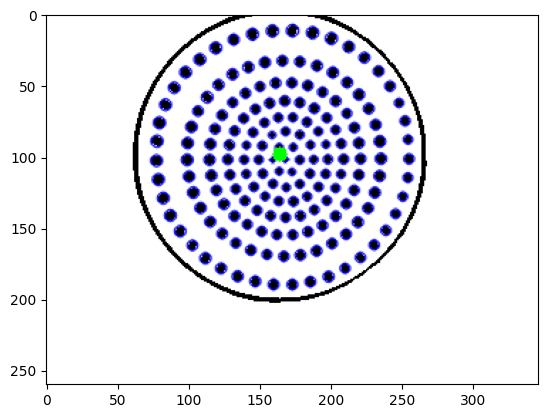

In [2]:
import matplotlib.pyplot as plt
from nvbts.markers import MarkerDetector

# Load the image
image = cv2.imread('/home/hussain/me/projects/nvbts/image.png')
md = MarkerDetector('nvbts/markers/blob.json', calibration_file)

# Detect the markers

img_with_markers, markers = md.apply(image, draw_keypoints=True)

# Draw the markers
plt.imshow(img_with_markers)

/home/hussain/miniconda3/envs/tmx/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hussain/miniconda3/envs/tmx/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


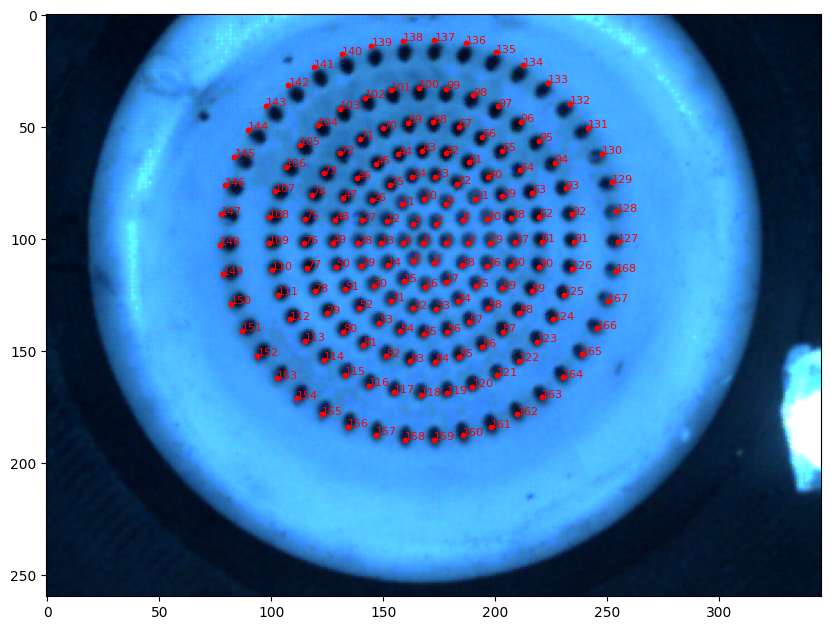

In [3]:
from nvbts.utils import sort_markers_k_means

markers_x, markers_y = markers[:, 0], markers[:, 1]

# Sort the markers
sorted_x, sorted_y , layer = sort_markers_k_means(markers_x, markers_y, k=7)

plt.figure(figsize=(10, 10))    
plt.imshow(image)

for i in range(len(sorted_x)):
    
    plt.text(sorted_x[i], sorted_y[i], str(i), fontsize=8, color='red')
    plt.scatter(sorted_x[i], sorted_y[i], color='red', s=10)


markers_exp = np.stack((sorted_x, sorted_y), axis=1)

calibrator.set_2d_markers(markers_exp)

Reprojection error: 2.851320185882265
Euler angles: [3.05640364 0.03421519 3.13706568]
Translation: [ 0.00393783 -0.00041309 -0.04893093]


(array([3.05640364, 0.03421519, 3.13706568]),
 array([ 0.00393783, -0.00041309, -0.04893093]))

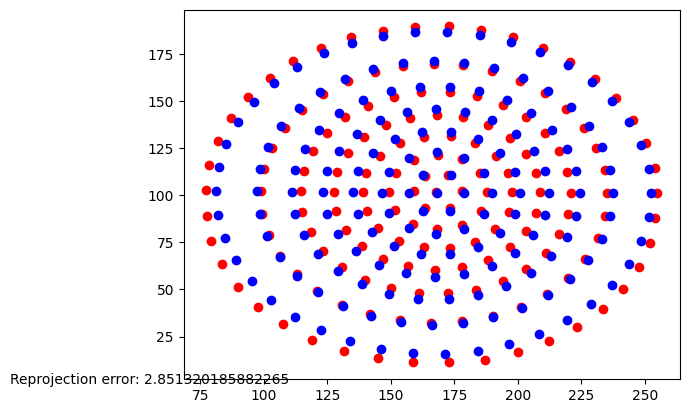

In [4]:
calibrator.calibrate()

In [5]:
calibrator.calibrate(method='matlab')

Calibration data saved to calib.mat. Run the matlab script to get the calibration data
